In [3]:
import numpy as np
from numpy import e, sin, cos
import matplotlib.pyplot as plt

x0 = -3e-9
x1 = 3e-9
a = 1e-9
E = 1.6e-19 * 0.5
V0 = 1.6e-19 * 1
m = 9.1093837e-31
h_ = 1.0545718e-34

In [4]:
x = np.linspace(x0, x1, 1000)

k1 = k3 = 1/h_*np.sqrt(2*m*E)
k2 = 1/h_*np.sqrt(complex(2*m*(E-V0)))

print(k1)
print(k2)
print(k3)

3620164750.1294384
3620164750.1294384j
3620164750.1294384


In [8]:
A = [
    [1, -1, -1, 0],
    [-k1, -k2, k2, 0],
    [0, e**(1j*k2*a), e**(-1j*k2*a), -e**(1j*k3*a)],
    [0, k2*e**(1j*k2*a), -k2*e**(-1j*k2*a), -k3*e**(1j*k3*a)]
]
b = [-1, -k1, 0, 0]
R, C, D, T = np.linalg.solve(A, b)

In [9]:
def _psi(x, a, T, D, C, R, k1, k2, k3):
    if x < 0:
        return e**(1j*k1*x) + R*e**(-1j*k1*x)
    elif 0 <= x < a:
        return C*e**(1j*k2*x) + D*e**(-1j*k2*x)
    else:
        return T*e**(1j*k3*x)

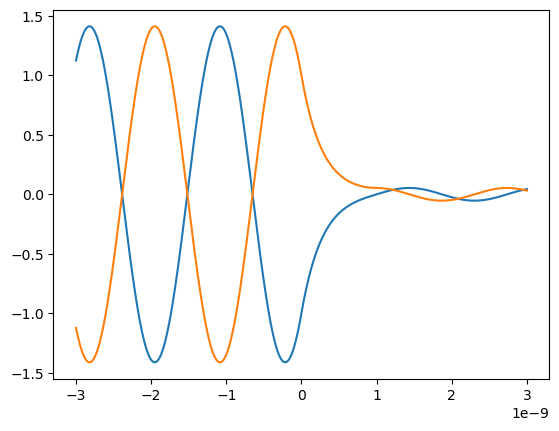

In [10]:
y = [_psi(x0, a, T, D, C, R, k1, k2, k3) for x0 in x]

o = 1
y_im = [y0.imag for y0 in y]
y_re = [y0.real for y0 in y]
plt.plot(x,y_im)
plt.plot(x,y_re)
plt.show()